In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd

In [4]:
import os
import numpy as np

# Specify the directory you want to walk
# Replace '/path/to/data' with the actual path to your data directory
directory = 'f1_analysis/data/'

# Check if the directory exists
if os.path.exists(directory):
    # Walk through the directory
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            # Print the full path of each file
            print(os.path.join(dirname, filename))
else:
    print(f"Directory {directory} not found.")

f1_analysis/data/seasons.csv
f1_analysis/data/constructors.csv
f1_analysis/data/circuits.csv
f1_analysis/data/status.csv
f1_analysis/data/sprint_results.csv
f1_analysis/data/drivers.csv
f1_analysis/data/races.csv
f1_analysis/data/constructor_results.csv
f1_analysis/data/constructor_standings.csv
f1_analysis/data/pit_stops.csv
f1_analysis/data/qualifying.csv
f1_analysis/data/driver_standings.csv
f1_analysis/data/lap_times.csv
f1_analysis/data/results.csv


In [9]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/00/4e/6258fc3b26f1f7abd1b2e75b1e9e4f12f13584136e2e1549f995ff4c6b7b/plotly-5.20.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 19.1 MB/s eta 0:00:00:00:0100:01


In [11]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 193.8 kB/s eta 0:00:000:00:01


In [12]:
# Importing all the libraries required 
import plotly.graph_objects as go
from plotly.offline import iplot
import folium
from  folium  import  plugins

In [16]:
resultsDF = pd.read_csv('f1_analysis/data/results.csv')
circuitsDF = pd.read_csv('f1_analysis/data/circuits.csv')
driversDF = pd.read_csv('f1_analysis/data/drivers.csv')
racesDF = pd.read_csv('f1_analysis/data/races.csv')
constructorDF = pd.read_csv('f1_analysis/data/constructors.csv')

## Reading the tables 

In [17]:
resultsDF.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [20]:
resultsDF.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [21]:
circuitsDF.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [23]:
circuitsDF.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

In [24]:
driversDF.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [25]:
driversDF.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [26]:
racesDF.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [27]:
racesDF.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [28]:
len(racesDF)

1101

In [29]:
constructorDF.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [30]:
constructorDF.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')

## Joining the Data

In [31]:
#joining resulDF with driversDF by column driverID,using inner join
dfresul = pd.merge(resultsDF,driversDF,on='driverId')
#joining racesDF with dfresul by column raceID,using inner join
dfresulcons = pd.merge(dfresul,racesDF,on='raceId')
#joining constructorDF with dfresulcons by column constructorID,using inner join
dfresulrac = pd.merge(dfresulcons,constructorDF,on='constructorId')

In [32]:
dfresulrac.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,25,19,5,1,23,8,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


## Data Exploration 

In [33]:
dfresulrac.isnull().sum()


resultId           0
raceId             0
driverId           0
constructorId      0
number_x           0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time_x             0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
driverRef          0
number_y           0
code               0
forename           0
surname            0
dob                0
nationality_x      0
url_x              0
year               0
round              0
circuitId          0
name_x             0
date               0
time_y             0
url_y              0
fp1_date           0
fp1_time           0
fp2_date           0
fp2_time           0
fp3_date           0
fp3_time           0
quali_date         0
quali_time         0
sprint_date        0
sprint_time        0
constructorRef     0
name_y             0
nationality_y      0
url                0
dtype: int64

In [34]:
dfresulrac = dfresulrac.drop(columns=['url_x','url_y','name_y','nationality_y','url','time_y'])
dfresulrac.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren
1,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren
2,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren
3,25,19,5,1,23,8,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren
4,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren


In [35]:
## All circuits heat map 


coordinates=[]
for lat,lng in zip(circuitsDF['lat'],circuitsDF['lng']):
  coordinates.append([lat,lng])

In [36]:
maps = folium.Map(location=[-15.788497,-47.879873],zoom_start=2,tiles='Stamen Toner')


In [37]:
maps.add_child(plugins.HeatMap(coordinates))
maps


## Driver Championships by season 


In [38]:
def championship_year(year):
    classi = dfresulrac[(dfresulrac['year']== year)].groupby('driverRef')['points'].sum().reset_index()
    classi = classi.sort_values(by=['points'],ascending=False)
    fig = go.Figure(data=[go.Bar(
    x=classi['driverRef'],
    y=classi['points']
)])
    fig.update_layout(title={
        'text': f"Driver´s championship ranking of {year}",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  yaxis=dict(
                            title='Points',
                            titlefont_size=16,
                            tickfont_size=14),
                  xaxis=dict(
                            title='Driver',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
    return iplot(fig)

In [46]:
# choose the year to show the ranking: 1950 - 2021


In [41]:
import matplotlib.pyplot as plt

def championship_year(year, dfresulrac):
    # Filter the data for the specified year and calculate the sum of points for each driver
    classi = dfresulrac[dfresulrac['year'] == year].groupby('driverRef')['points'].sum().reset_index()
    # Sort the data by points in descending order
    classi = classi.sort_values(by=['points'], ascending=False)
    
    # Create the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(classi['driverRef'], classi['points'], color='blue')  # Create a bar plot
    plt.title(f"Driver's Championship Ranking of {year}", fontsize=16)  # Set the title
    plt.xlabel('Driver', fontsize=14)  # Set the x-axis label
    plt.ylabel('Points', fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Enable grid
    plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
    
    # Show the plot
    plt.show()

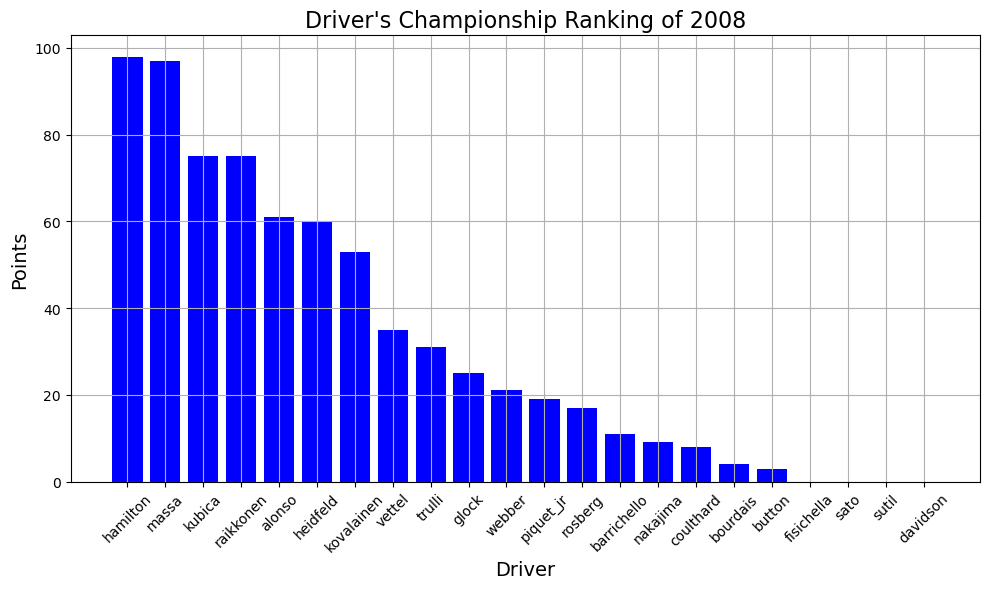

In [45]:
championship_year(2008, dfresulrac)

## Constructors' Championship ranking by season¶


In [47]:
import matplotlib.pyplot as plt

def championship_cons(year, dfresulrac):
    # Filter the data for the specified year and calculate the sum of points for each constructor
    classi_equp = dfresulrac[dfresulrac['year'] == year].groupby('constructorRef')['points'].sum().reset_index()
    # Sort the data by points in descending order
    classi_equp = classi_equp.sort_values(by=['points'], ascending=False)
    
    # Create the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(classi_equp['constructorRef'], classi_equp['points'], color='green')  # Create a bar plot
    plt.title(f"Constructors' Championship Ranking of {year}", fontsize=16)  # Set the title
    plt.xlabel('Constructor', fontsize=14)  # Set the x-axis label
    plt.ylabel('Points', fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Enable grid
    plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
    
    # Show the plot
    plt.show()


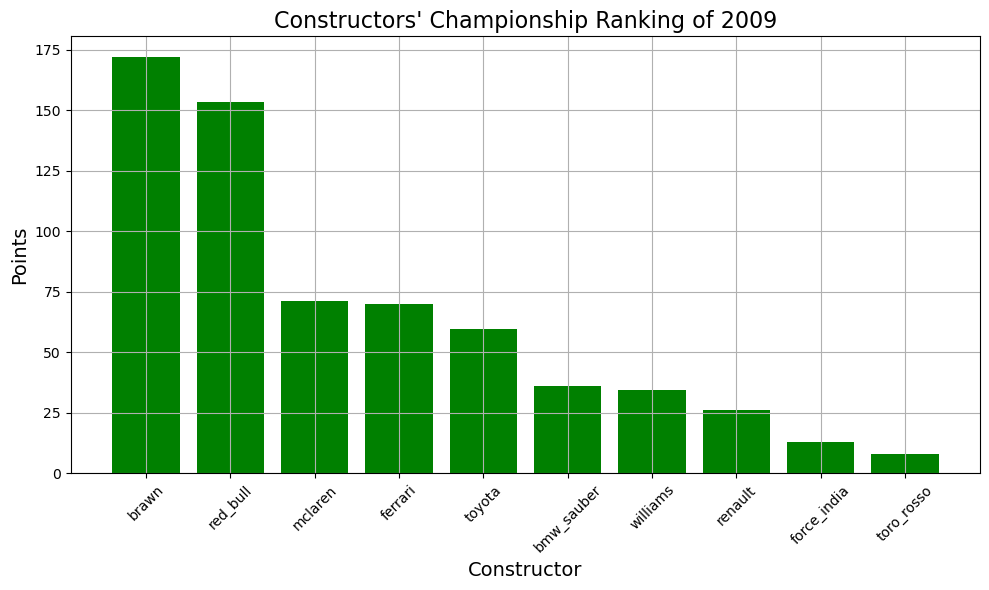

In [49]:
championship_cons(2009, dfresulrac)

## Drivers with most wins



In [54]:
def plot_driver_wins(dfresulrac):
    # Filter rows where position is '1', indicating a win
    num_wins = dfresulrac[dfresulrac['position'] == '1']
    
    # Convert 'position' to integer for summation
    num_wins['position_mod'] = num_wins['position'].astype(int)
    
    # Group by 'driverRef' and 'nationality_x', and sum the wins
    num_wins = num_wins.groupby(['driverRef', 'nationality_x'])['position_mod'].sum().reset_index()
    
    # Sort the data by number of wins in descending order
    num_wins = num_wins.sort_values(by=['position_mod'], ascending=False)
    
    # Create the plot
    plt.figure(figsize=(14, 10))  # Set the figure size
    bars = plt.bar(num_wins['driverRef'], num_wins['position_mod'], color='red')  # Create a bar plot
    
    # Add hover text (nationality)
    plt.bar_label(bars, labels=num_wins['nationality_x'], padding=3, rotation=90, fontsize=8)
    
    plt.title("Drivers with More Wins", fontsize=16)  # Set the title
    plt.xlabel('Driver', fontsize=14)  # Set the x-axis label
    plt.ylabel('Wins', fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Enable grid
    plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
    
    # Show the plot
    plt.show()

/tmp/ipykernel_372/3419491944.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



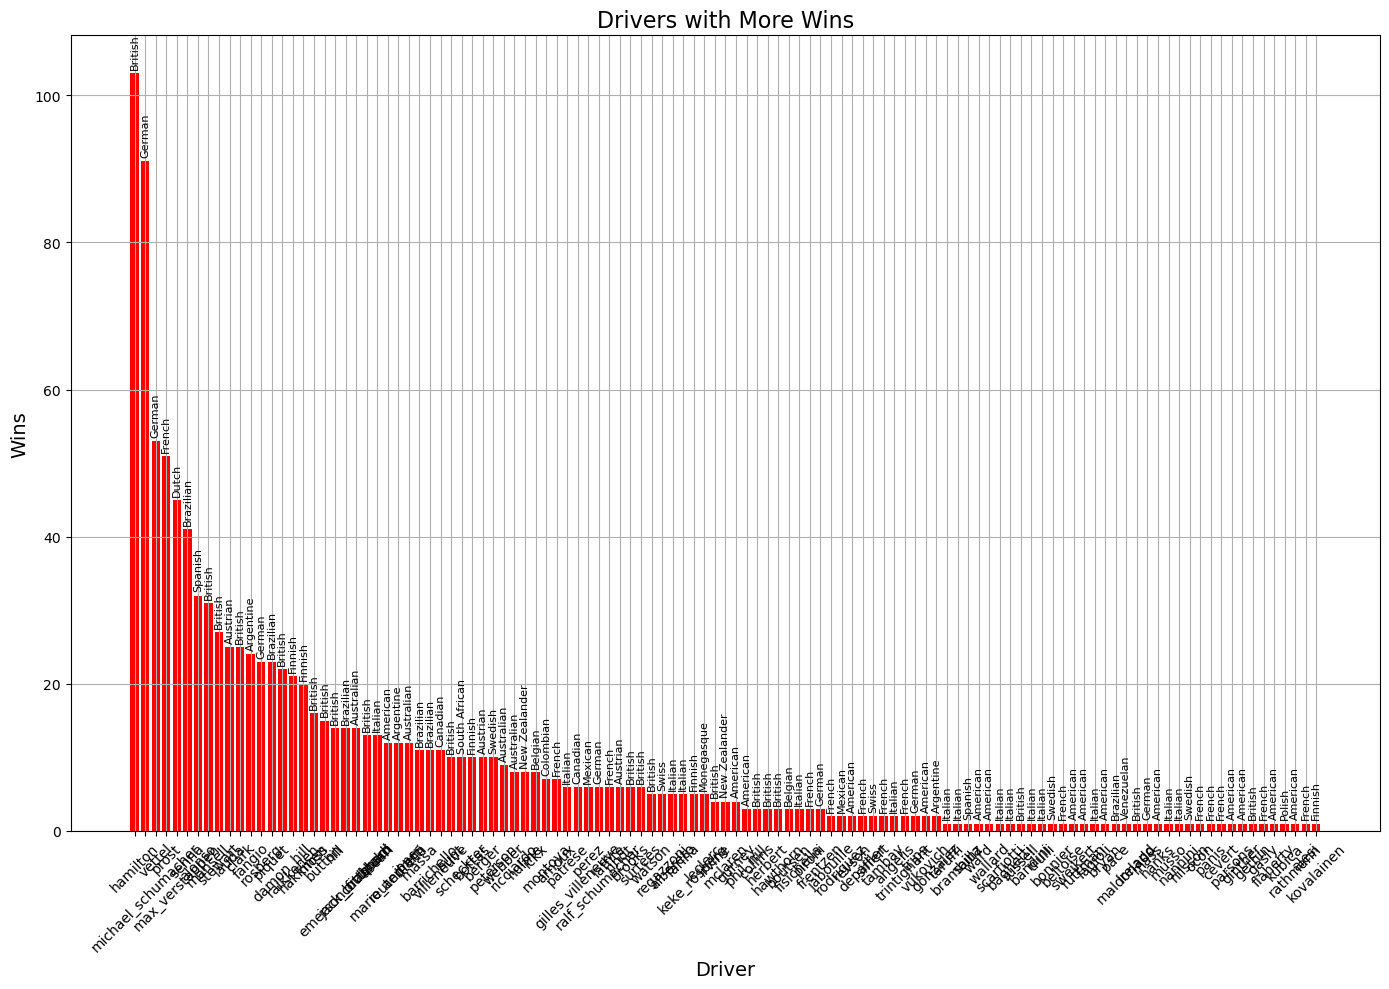

In [55]:
plot_driver_wins(dfresulrac)

## Drivers with most wins

In [60]:
def plot_driver_titles_corrected(champions):
    # Create the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(champions['titles'], champions['count'], color='purple')  # Create a bar plot
    plt.title("Drivers with More Titles", fontsize=16)  # Set the title
    plt.xlabel('Driver', fontsize=14)  # Set the x-axis label
    plt.ylabel('Titles', fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Enable grid
    plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

    # Show the plot
    plt.show()

In [63]:
plot_driver_titles(dfresulrac)

               titles  count
0            hamilton      7
1  michael_schumacher      7
2               prost      5
3              fangio      5
4              vettel      4
Index(['titles', 'count'], dtype='object')
KeyError: 'driver'. Check DataFrame columns and ensure they are named correctly.


<Figure size 1000x600 with 0 Axes>

## Drivers with most pole positions 

In [65]:
driver_pole = dfresulrac[dfresulrac['grid']== 1].groupby(by=['driverRef','nationality_x'])['grid'].sum().reset_index()
driver_pole = driver_pole.sort_values(by=['grid'], ascending=False)


In [66]:
def plot_pole_positions(dfresulrac):
    # Filter the data for where grid position is 1 (pole position)
    driver_pole = dfresulrac[dfresulrac['grid'] == 1].groupby(by=['driverRef', 'nationality_x'])['grid'].count().reset_index()
    # Sort by number of pole positions in descending order
    driver_pole = driver_pole.sort_values(by=['grid'], ascending=False)
    
    # Create the plot
    plt.figure(figsize=(12, 8))  # Set the figure size
    bars = plt.bar(driver_pole['driverRef'], driver_pole['grid'], color='navy')  # Create a bar plot
    
    # Add hovertext equivalent (nationality)
    plt.bar_label(bars, labels=driver_pole['nationality_x'], padding=3, rotation=90, fontsize=8)

    plt.title("Drivers with More Pole Positions", fontsize=16)  # Set the title
    plt.xlabel('Driver', fontsize=14)  # Set the x-axis label
    plt.ylabel('Pole Positions', fontsize=14)  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True, axis='y')  # Enable grid for y-axis
    plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

    # Show the plot
    plt.show()

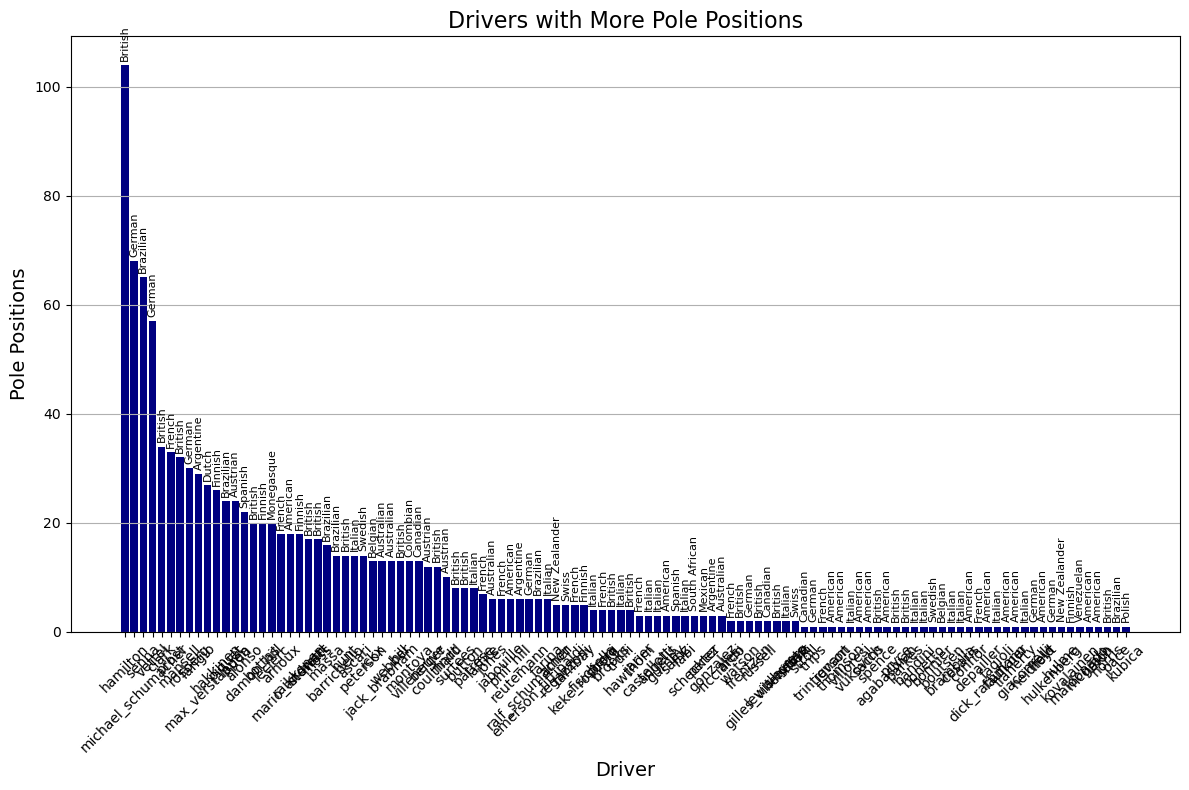

In [68]:
plot_pole_positions(dfresulrac)

## Drivers with most podiums 


In [71]:
def plot_driver_podiums(dfresulrac):
    # Create a podium count for each position
    podium_counts = dfresulrac[dfresulrac['position'].isin(['1', '2', '3'])]
    podium_counts['position'] = podium_counts['position'].astype(int)
    podium_summary = podium_counts.pivot_table(index='driverRef', columns='position', aggfunc='size', fill_value=0)

    # Prepare data for stacked bar chart
    drivers = podium_summary.index
    first_places = podium_summary.get(1, np.zeros(len(drivers)))
    second_places = podium_summary.get(2, np.zeros(len(drivers)))
    third_places = podium_summary.get(3, np.zeros(len(drivers)))
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    width = 0.35  # the width of the bars
    ind = np.arange(len(drivers))  # the x locations for the groups
    
    # Stacked bars
    p1 = ax.bar(ind, first_places, width, label='1st Place', color='gold')
    p2 = ax.bar(ind, second_places, width, bottom=first_places, label='2nd Place', color='silver')
    p3 = ax.bar(ind, third_places, width, bottom=first_places + second_places, label='3rd Place', color='green')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Driver', fontsize=14)
    ax.set_ylabel('Podiums', fontsize=14)
    ax.set_title('Drivers with More Podiums', fontsize=16)
    ax.set_xticks(ind)
    ax.set_xticklabels(drivers, rotation=45)
    ax.legend()

    plt.grid(True, axis='y')
    plt.tight_layout()  
    plt.show()

/tmp/ipykernel_372/3842933417.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



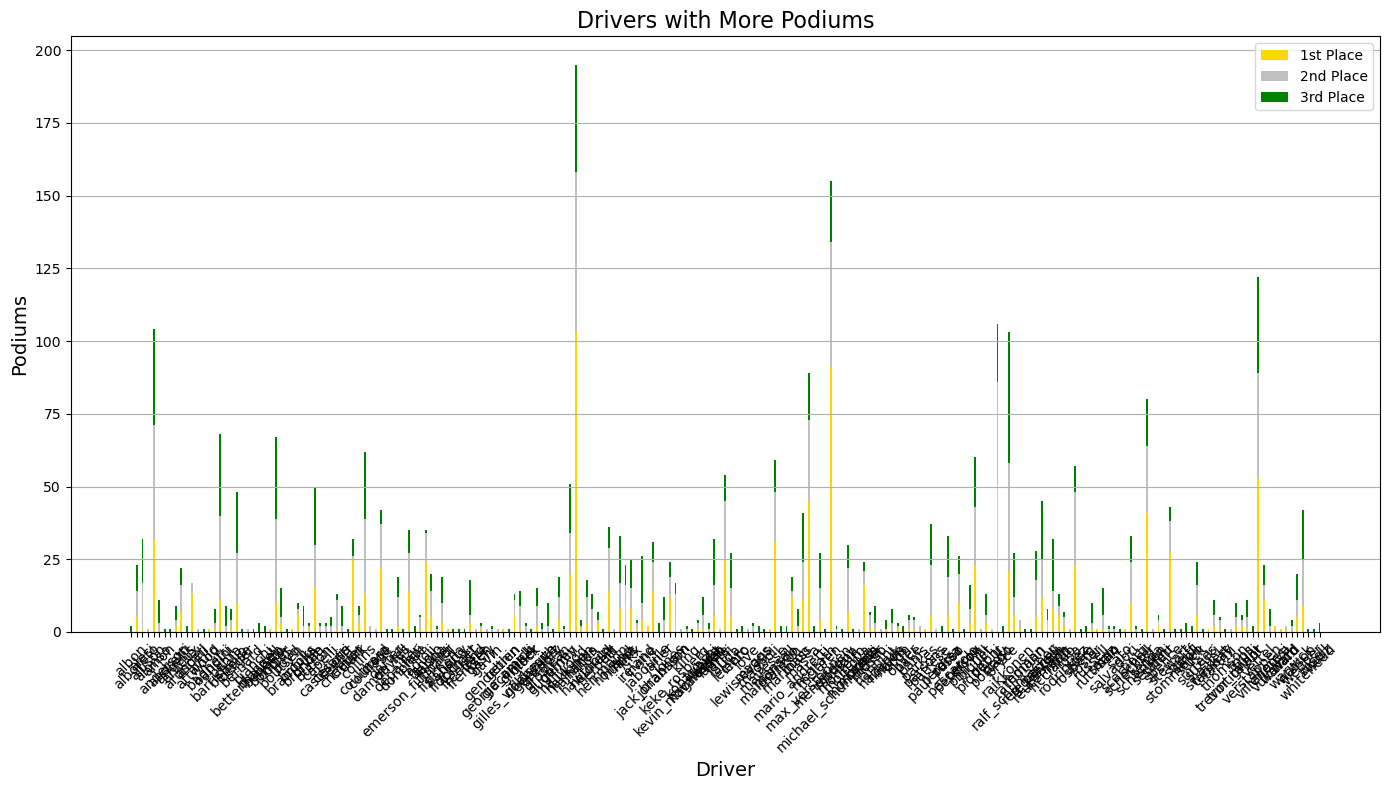

In [72]:
plot_driver_podiums(dfresulrac)

## Country with most wins 

In [73]:
def plot_wins_by_nationality(dfresulrac):
    # Filter data where position is '1' (win)
    winners = dfresulrac[dfresulrac['position'] == '1']
    
    # Count wins by nationality
    win_counts = winners['nationality_x'].value_counts()

    # Create the pie chart
    fig, ax = plt.subplots()
    ax.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, hole=0.3)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Country with More Wins", fontsize=16)
    plt.tight_layout()  # Adjust the layout

    # Show the plot
    plt.show()

TypeError: Axes.pie() got an unexpected keyword argument 'hole'

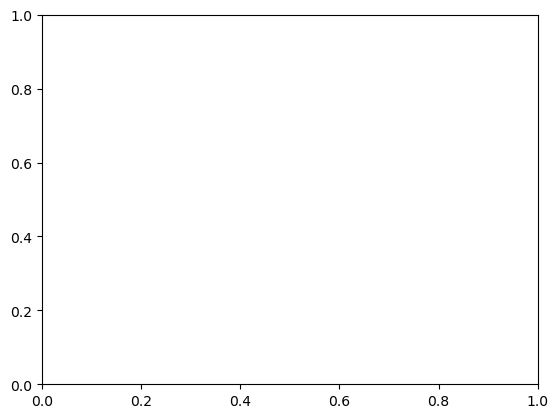

In [74]:
plot_wins_by_nationality(dfresulrac)